# Microsoft Movies Studios Project - EDA

In [24]:
! ls ~/Projects/dc-ds/lectures/dc-ds-100719/module-1/week-3/project/data/

bom.movie_gross.csv.gz       imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz      rt.movie_info.tsv.gz
imdb.title.akas.csv.gz       rt.reviews.tsv.gz
imdb.title.basics.csv.gz     tmdb.movies.csv.gz
imdb.title.crew.csv.gz       tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


In [152]:
import locale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
#pd.set_option('display.float_format', lambda x: "0:,.2f".format(x))
#locale.setlocale(locale.LC_ALL, '') 

# Box Office Mojo Data

In [105]:
# Box Office Mojo
bomojo_df = pd.read_csv('~/Projects/dc-ds/lectures/dc-ds-100719/module-1/week-3/project/data/bom.movie_gross.csv.gz')

In [27]:
# Explore size of data and datatypes
print(bomojo_df.shape)
bomojo_df.head()
bomojo_df.info()

(3387, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [28]:
# convert foreign_gross to a float, must strip all punctuation from the strings first
def strip_punctuation_from_number_string(s, punc="$.,"):
    result = ''
    for char in s:
        if char not in punc:
            result = result + char
    return result
        
bomojo_df['foreign_gross'] = bomojo_df['foreign_gross'].apply(lambda x: strip_punctuation_from_number_string(str(x)))
bomojo_df['foreign_gross'] = bomojo_df['foreign_gross'].astype(float)

In [29]:
bomojo_df.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.037000e+03,3387.000000
mean,2.874585e+07,7.487284e+07,2013.958075
std,6.698250e+07,1.374106e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.700000e+06,2012.000000
50%,1.400000e+06,1.870000e+07,2014.000000
75%,2.790000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [30]:
# Studios with highest grossing films across years 2010-2018
bomojo_studio_millions_df = bomojo_df.groupby(['studio']).sum()/1000000
bomojo_studio_millions_df.sort_values('foreign_gross', ascending=False).head()

,domestic_gross,foreign_gross,year
studio,,,
BV,18419.029199,25793.877210,0.213451
Fox,10949.499997,20055.866599,0.273882
WB,12168.046000,18667.902998,0.281941
Uni.,12902.393000,16854.799923,0.296082
Sony,8459.683098,13945.354998,0.221575


In [31]:
# highest foreign grossing films 2010-2018
bomojo_title_millions_df = bomojo_df.groupby(['title']).sum()/1000000
bomojo_title_millions_df.sort_values('foreign_gross', ascending=False).head()

,domestic_gross,foreign_gross,year
title,,,
Harry Potter and the Deathly Hallows Part 2,381.0,960.5,0.002011
Avengers: Age of Ultron,459.0,946.4,0.002015
Marvel's The Avengers,623.4,895.5,0.002012
Jurassic World: Fallen Kingdom,417.7,891.8,0.002018
Frozen,400.7,875.7,0.002013


# IMDB Data

In [32]:
# IMDB Basics
imdb_name_basics_df = pd.read_csv('~/Projects/dc-ds/lectures/dc-ds-100719/module-1/week-3/project/data/imdb.name.basics.csv.gz')

IMDB Name Basics:
- nconst (an string id)
- primary name
- birth year 
- death year
- primary profession (comma-separated list)
- known for titles (comma-separated list of title ids)

In [33]:
imdb_name_basics_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [34]:
# IMDB AKAs
imdb_akas_df = pd.read_csv('~/Projects/dc-ds/lectures/dc-ds-100719/module-1/week-3/project/data/imdb.title.akas.csv.gz')

IMDB AKAS:
This set of data indicates all the names a given movie is known by
- title_id (a string id, also referenced in basics)
- ordering
- title
- region
- language
- types
- attributes
- is_original_title

In [35]:
print(len(imdb_akas_df[imdb_akas_df['is_original_title']==1]))
frozen_movie_ids = imdb_akas_df[(imdb_akas_df.title.str.startswith('Frozen')) & (imdb_akas_df.is_original_title)].title_id
frozen_movie_ids = frozen_movie_ids.squeeze()
frozen_movie_ids
imdb_akas_df[(imdb_akas_df.title_id.isin(frozen_movie_ids)) & (imdb_akas_df.is_original_title == 1)]

44700


,title_id,ordering,title,region,language,types,attributes,is_original_title
10999,tt1323045,23,Frozen,NaN,NaN,original,NaN,1.0
23590,tt2294629,38,Frozen,NaN,NaN,original,NaN,1.0
211605,tt4150316,1,Frozen in Time,NaN,NaN,original,NaN,1.0
225847,tt4520988,22,Frozen II,NaN,NaN,original,NaN,1.0


In [36]:
avengers_movie_ids = imdb_akas_df[(imdb_akas_df.title.str.startswith('Avenger')) & (imdb_akas_df.is_original_title)].title_id.squeeze()
imdb_akas_df[(imdb_akas_df.title_id.isin(avengers_movie_ids)) & (imdb_akas_df.is_original_title == 1)]

,title_id,ordering,title,region,language,types,attributes,is_original_title
69881,tt2395427,24,Avengers: Age of Ultron,NaN,NaN,original,NaN,1.0
190575,tt4154796,15,Avengers: Endgame,NaN,NaN,original,NaN,1.0
311338,tt4154756,30,Avengers: Infinity War,NaN,NaN,original,NaN,1.0


In [37]:
# print("Regions:", imdb_akas_df.region.unique())
# print("Ordering:", imdb_akas_df.ordering.unique())
# print("Language:", imdb_akas_df.language.unique())
print("Types:", imdb_akas_df.types.unique())
print("Attributes:", imdb_akas_df.attributes.unique())

Types: [nan 'imdbDisplay' 'working' 'original' 'alternative' 'video' 'dvd' 'tv'
 'festival' 'dvd\x02imdbDisplay' 'festival\x02working']
Attributes: [nan 'short title' '3-D version' 'fake working title'
 'informal alternative title' 'dubbed version'
 'transliterated ISO-LATIN-1 title' 'original script title' 'IMAX version'
 'alternative spelling' 'DVD box title' 'new title' 'literal title'
 'literal English title' 'alternative transliteration' 'promotional title'
 'poster title' 'cable TV title' 'informal title' 'long title'
 'informal literal English title' 'promotional abbreviation'
 'complete title' 'informal short title' 'rerun title'
 'original subtitled version' 'longer version' 'informal literal title'
 'theatrical title' 'trailer title' 'informal English title'
 'closing credits title' 'Cannes festival title'
 'Berlin film festival title' 'bootleg title' 'reissue title'
 'series title' 'review title' 'literal translation of working title'
 'premiere title' 'segment title' 'long 

In [38]:
# IMDB Title Basics
imdb_title_basics_df = pd.read_csv('~/Projects/dc-ds/lectures/dc-ds-100719/module-1/week-3/project/data/imdb.title.basics.csv.gz')

IMDB Title Basics
- tconst (title id)
- primary_title
- original_title
- start_year
- runtime_minutes
- genres (comma-separated list)

(146144, 6)
Year range: 2010 - 2115
Runtime range: 1.0 - 51420.0
AxesSubplot(0.125,0.125;0.775x0.755)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


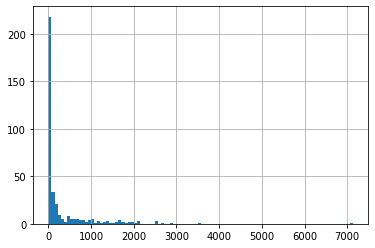

In [39]:
print(imdb_title_basics_df.shape)
print("Year range:", imdb_title_basics_df.start_year.min(), "-", imdb_title_basics_df.start_year.max())
print("Runtime range:", imdb_title_basics_df.runtime_minutes.min(), "-", imdb_title_basics_df.runtime_minutes.max())

print(imdb_title_basics_df.runtime_minutes.value_counts().hist(bins=100))
imdb_title_basics_df[(imdb_title_basics_df.start_year < 2019) 
                     & (imdb_title_basics_df.start_year > 2009)]\
                    .groupby('start_year').count()

imdb_title_basics_df.head()

In [40]:
imdb_title_basics_df['genres'] = imdb_title_basics_df['genres'].astype(str)
imdb_title_basics_df['genres_list'] = [s.split(',') for s in list(imdb_title_basics_df['genres'])]

In [41]:
# Drop records that don't have a genre
imdb_title_basics_df[imdb_title_basics_df['genres']=="nan"].shape

(5408, 7)

In [42]:
flatten_genres = list(set([val for sublist in imdb_title_basics_df['genres_list'] for val in sublist]))
#flatten_genres

In [43]:
imdb_title_basics_df[imdb_title_basics_df.tconst.isin(avengers_movie_ids)]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genres_list
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
72820,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
72821,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"


In [44]:
# IMDB Title Crew
imdb_title_crew_df = pd.read_csv('~/Projects/dc-ds/lectures/dc-ds-100719/module-1/week-3/project/data/imdb.title.crew.csv.gz')

In [45]:
print(imdb_title_crew_df.shape)
imdb_title_crew_df.info()
imdb_title_crew_df.head()

(146144, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


IMDB Title Crew
- tconst (title id)
- directors (list of name ids)
- writers (list of name ids)

In [48]:
# IMDB Title Principals
imdb_title_principals_df = pd.read_csv('~/Projects/dc-ds/lectures/dc-ds-100719/module-1/week-3/project/data/imdb.title.principals.csv.gz')

In [292]:
print(imdb_title_principals_df.shape)
print("Unique titles in the Principals table:", len(imdb_title_principals_df.tconst.unique()))
print("Number of directors:", len(imdb_title_principals_df[imdb_title_principals_df.category == 'director']))
imdb_title_principals_df.info()
imdb_title_principals_df.head()

imdb_title_principal_names = imdb_title_principals_df.set_index('nconst').join(imdb_name_basics_df.set_index('nconst'))
imdb_title_director = imdb_title_principal_names[imdb_title_principal_names.category == 'director']
# director_counts = imdb_title_principals_df[imdb_title_principals_df.category == 'director'].groupby('tconst').count()
# director_counts
#director_counts[director_counts.nconst > 1].shape


(1028186, 6)
Unique titles in the Principals table: 143454
Number of directors: 146393
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [326]:
# Create a dataframe with the title, director and year
imdb_titlename_directorname = imdb_title_director.set_index('tconst')\
.join(imdb_title_basics_df.set_index('tconst'), how="inner")

col_list = ['primary_title', 'start_year', 'runtime_minutes', 'genres_list', 'director']
imdb_titlename_directorname = imdb_titlename_directorname.rename(columns={'primary_name':'director'})
imdb_titlename_directorname = imdb_titlename_directorname.loc[:,col_list]
#title_dir_groupby = imdb_titlename_directorname.groupby(['director']).count().sort_values(by='primary_title', ascending=False)

In [50]:
# IMDB Title Ratings
imdb_title_ratings_df = pd.read_csv('~/Projects/dc-ds/lectures/dc-ds-100719/module-1/week-3/project/data/imdb.title.ratings.csv.gz')

In [51]:
imdb_title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [52]:
#****Understand a fast way to plot data as a histogram to 

In [62]:
print("Title Basics Shape:", imdb_title_basics_df.shape)
print("Title Ratings Shape:", imdb_title_ratings_df.shape)
print(imdb_title_basics_df.info())
print(imdb_title_ratings_df.info())

Title Basics Shape: (146144, 7)
Title Ratings Shape: (73856, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             146144 non-null object
genres_list        146144 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 7.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


dtype('O')

In [60]:
imdb_title_basics_df.tconst = imdb_title_basics_df.tconst.astype(str)
imdb_title_basics_df.tconst.dtype

dtype('O')

In [87]:
imdb_title_ratings_df.tconst = imdb_title_ratings_df.tconst.astype(str)
imdb_title_ratings_df.numvotes.mean()

3523.6621669194105

In [119]:
# had to set the index in order to use the join
imdb_titles_ratings = imdb_title_basics_df.set_index('tconst')\
.join(imdb_title_ratings_df.set_index('tconst'), how='left', on='tconst')

In [74]:
imdb_titles_ratings.sort_values(by=['numvotes', 'averagerating'], ascending=[False,False])[imdb_titles_ratings.averagerating>8]

/Users/chau/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,primary_title,original_title,start_year,runtime_minutes,genres,genres_list,averagerating,numvotes
tconst,,,,,,,,
tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",8.8,1841066.0
tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller","[Action, Thriller]",8.4,1387769.0
tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi","[Adventure, Drama, Sci-Fi]",8.6,1299334.0
tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western","[Drama, Western]",8.4,1211405.0
tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",8.1,1183655.0
tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama","[Biography, Crime, Drama]",8.2,1035358.0
tt1130884,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller","[Mystery, Thriller]",8.1,1005960.0
tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy","[Action, Adventure, Comedy]",8.1,948394.0
tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,2015,120.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",8.1,780910.0


In [97]:
print(imdb_titles_ratings.sort_values(by=['averagerating','numvotes'], ascending=[False,False])\
.loc[imdb_titles_ratings.numvotes>50000].shape)
imdb_titles_ratings.sort_values(by=['averagerating','numvotes'], ascending=[False,False])\
.loc[imdb_titles_ratings.numvotes>50000]

(1064, 8)


,primary_title,original_title,start_year,runtime_minutes,genres,genres_list,averagerating,numvotes
tconst,,,,,,,,
tt5813916,The Mountain II,Dag II,2016,135.0,"Action,Drama,War","[Action, Drama, War]",9.3,100568.0
tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",8.8,1841066.0
tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",8.8,441135.0
tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi","[Adventure, Drama, Sci-Fi]",8.6,1299334.0
tt1424432,Senna,Senna,2010,106.0,"Biography,Documentary,Sport","[Biography, Documentary, Sport]",8.6,55318.0
tt1675434,The Intouchables,Intouchables,2011,112.0,"Biography,Comedy,Drama","[Biography, Comedy, Drama]",8.5,677343.0
tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",8.5,670926.0
tt2582802,Whiplash,Whiplash,2014,106.0,"Drama,Music","[Drama, Music]",8.5,616916.0
tt4633694,Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse,2018,117.0,"Action,Adventure,Animation","[Action, Adventure, Animation]",8.5,210869.0


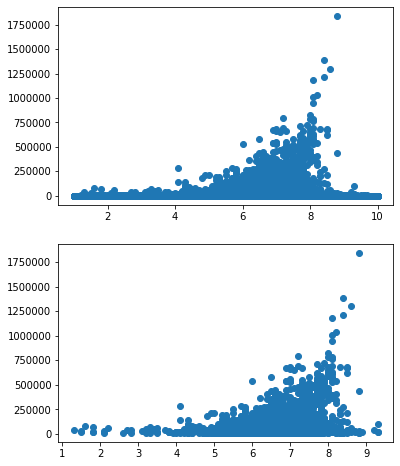

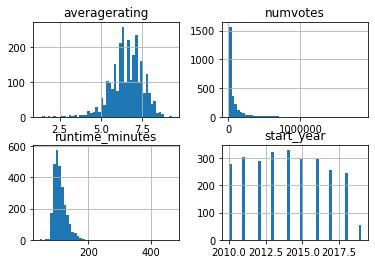

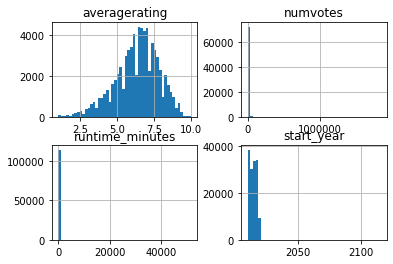

In [360]:
imdb_titles_ratings_numvotes_gt_100000 = imdb_titles_ratings[imdb_titles_ratings.numvotes>10000]
fig = plt.figure(figsize=(6,8))
axes = fig.add_subplot(2,1,1)
axes.scatter(x=imdb_titles_ratings.averagerating, y=imdb_titles_ratings.numvotes)
axes2 = fig.add_subplot(2,1,2)
axes2.scatter(x=imdb_titles_ratings_numvotes_gt_100000.averagerating, y=imdb_titles_ratings_numvotes_gt_100000.numvotes)
#axes3 = fig.add_subplot(3,1,3)
axes3 = imdb_titles_ratings_numvotes_gt_100000.hist(bins=50)
axes3 = imdb_titles_ratings.hist(bins=50)

# TO DO on  IMDB Data:
- Review correlation between number of votes and rating
- Review distribution of votes and ratings by genre
- Find out the distribution of principals for the films with the highest num of votes and highest ratings
- Define the highest num of votes and ratings

In [106]:
'''Try joining box office mojo with the IMDB titles'''
print("Box Office Mojo Data:", bomojo_df.shape)
bomojo_df.info()
print("\nIMDB Title Data:", imdb_title_basics_df.shape)
imdb_title_basics_df.info()

Box Office Mojo Data: (3387, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB

IMDB Title Data: (146144, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             146144 non-null object
genres_list        146144 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 7.8+ MB


In [361]:
# Look at how the primary and original title differ... original title is often in a foreign language
imdb_title_basics_df[imdb_title_basics_df.primary_title!=imdb_title_basics_df.original_title].shape

(14504, 7)

In [113]:
imdb_bom_df = imdb_titles_ratings.set_index('primary_title').join(bomojo_df.set_index('title'), how='inner')

In [362]:
imdb_bom_df

,original_title,start_year,runtime_minutes,genres,genres_list,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
'71,'71,2014,99.00,"Action,Drama,Thriller","[Action, Drama, Thriller]",7.20,"46,103.00",RAtt.,"1,300,000.00",355000,2015
"1,000 Times Good Night",Tusen ganger god natt,2013,117.00,"Drama,War","[Drama, War]",7.10,"6,848.00",FM,"53,900.00",NaN,2014
10 Cloverfield Lane,10 Cloverfield Lane,2016,103.00,"Drama,Horror,Mystery","[Drama, Horror, Mystery]",7.20,"260,383.00",Par.,"72,100,000.00",38100000,2016
10 Years,10 Years,2011,100.00,"Comedy,Drama,Romance","[Comedy, Drama, Romance]",6.10,"22,484.00",Anch.,"203,000.00",NaN,2012
1001 Grams,1001 Gram,2014,93.00,Drama,[Drama],6.30,"1,301.00",KL,"11,000.00",NaN,2015
102 Not Out,102 Not Out,2018,102.00,"Comedy,Drama","[Comedy, Drama]",7.50,"4,802.00",Sony,"1,300,000.00",10900000,2018
11-11-11,11-11-11,2011,90.00,"Horror,Mystery,Thriller","[Horror, Mystery, Thriller]",4.00,"11,712.00",Rocket,"32,800.00",5700000,2011
12 Strong,12 Strong,2018,130.00,"Action,Drama,History","[Action, Drama, History]",6.60,"50,155.00",WB,"45,800,000.00",21600000,2018
12 Years a Slave,12 Years a Slave,2013,134.00,"Biography,Drama,History","[Biography, Drama, History]",8.10,"577,301.00",FoxS,"56,700,000.00",131100000,2013
127 Hours,127 Hours,2010,94.00,"Adventure,Biography,Drama","[Adventure, Biography, Drama]",7.60,"323,949.00",FoxS,"18,300,000.00",42400000,2010


In [365]:
imdb_bom_df[imdb_bom_df.original_title.isna]

TypeError: isna() takes 1 positional argument but 2 were given

# Rotten Tomatoes Dataset

In [148]:
rt_movies_df = pd.read_csv('~/Projects/dc-ds/lectures/dc-ds-100719/module-1/week-3/project/data/rt.movie_info.tsv.gz', sep='\t')

In [162]:
rt_movies_df.info()
rt_movies_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.3+ KB


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [343]:
rt_movies_df.groupby('director').count().sort_values(by='genre',ascending=False)

,id,synopsis,rating,genre,writer,theater_date,dvd_date,currency,box_office,runtime,studio
director,,,,,,,,,,,
Steven Spielberg,10,10,10,10,8,10,10,2,2,10,5
Clint Eastwood,8,8,8,8,7,8,8,4,4,8,3
William Friedkin,4,4,4,4,4,4,4,1,1,4,2
Yimou Zhang,4,4,4,4,3,3,3,2,2,4,2
Ridley Scott,4,4,4,4,3,4,4,1,1,4,2
Jim Jarmusch,4,4,4,4,3,4,4,1,1,4,2
Alfred Hitchcock,4,4,4,4,3,4,4,0,0,4,0
Woody Allen,4,4,4,4,4,4,4,1,1,4,1
Bruce Beresford,4,4,4,4,4,3,3,2,2,4,2


In [338]:

imdb_titlename_directorname[imdb_titlename_directorname.director == 'Wes Anderson']
#imdb_title_basics_df[imdb_title_basics_df.original_title == 'Avatar']

,primary_title,start_year,runtime_minutes,genres_list,director
tconst,,,,,
tt1748122,Moonrise Kingdom,2012,94.00,"[Adventure, Comedy, Drama]",Wes Anderson
tt2278388,The Grand Budapest Hotel,2014,99.00,"[Adventure, Comedy, Crime]",Wes Anderson
tt5104604,Isle of Dogs,2018,101.00,"[Adventure, Animation, Comedy]",Wes Anderson
tt8847712,The French Dispatch,2020,nan,"[Comedy, Drama, Romance]",Wes Anderson


In [171]:
# Try to join the rotten tomatoes data with imdb based on the director names

rt_movies_imdb_names = rt_movies_df.set_index('director').join(imdb_titlename_directorname.loc[:,col_list].set_index('director'))

In [178]:
rt_movies_imdb_names[rt_movies_imdb_names.nconst.isnull()]

,id,synopsis,rating,genre,writer,theater_date,dvd_date,currency,box_office,runtime,studio,nconst,birth_year,death_year,primary_profession,known_for_titles
Adam Ravetch|Sarah Robertson,596,"""Arctic Tale"" is an epic adventure that explor...",G,Documentary|Special Interest,Linda Woolverton|Mose Richards|Kristin Gore,"Aug 17, 2007","Aug 1, 2017",$,"598,103",86 minutes,Paramount Vantage,NaN,nan,nan,NaN,NaN
Adam Silver|Ben Hayflick,390,A powerful industrialist attempts to perform s...,PG-13,Action and Adventure|Science Fiction and Fantasy,Ben Hayflick|Adam Silver,"May 25, 2010","May 25, 2010",NaN,NaN,94 minutes,NaN,NaN,nan,nan,NaN,NaN
Agust Agustsson|Ruth Schell,739,"The title character, a fashion teacher (Berta ...",NR,Drama,NaN,NaN,NaN,NaN,NaN,114 minutes,NaN,NaN,nan,nan,NaN,NaN
Alain Tanner,1735,NaN,NR,Art House and International|Drama,Alain Tanner,"Jan 1, 1983","Jul 15, 1992",NaN,NaN,108 minutes,NaN,NaN,nan,nan,NaN,NaN
Alan Bunce,1604,Children's book authors Jean and Laurent de Br...,G,Animation|Art House and International|Kids and...,NaN,"Jul 28, 1989","Jan 20, 2004",NaN,NaN,75 minutes,NaN,NaN,nan,nan,NaN,NaN
Alan Hale,98,This video features the story of a mother tell...,NR,Comedy|Drama,Beulah Marie Dix,NaN,NaN,NaN,NaN,104 minutes,NaN,NaN,nan,nan,NaN,NaN
Alan Metter,1684,Ostensibly based on the hit single by Cyndi La...,PG,Comedy,Amy Spies,"Apr 12, 1985","Jul 26, 2005",NaN,NaN,90 minutes,NaN,NaN,nan,nan,NaN,NaN
Albert Band,1382,A canine variation on the vampire legend. Mich...,R,Horror|Mystery and Suspense,NaN,"Mar 11, 1981","Apr 27, 2004",NaN,NaN,85 minutes,NaN,NaN,nan,nan,NaN,NaN
Albert Lewin,150,"A legendary film, which has been elevated to h...",NR,Classics|Drama|Mystery and Suspense|Science Fi...,Albert Lewin,"Oct 15, 1951","May 23, 2000",NaN,NaN,123 minutes,NaN,NaN,nan,nan,NaN,NaN
Albert Parker,719,"Sworn to avenge his father's murder, a young a...",NR,Action and Adventure|Classics,Douglas Fairbanks|Jack Cunningham|Lotta Woods,"Mar 8, 1926","Oct 12, 1999",NaN,NaN,122 minutes,NaN,NaN,nan,nan,NaN,NaN


In [154]:
rt_reviews_df = pd.read_csv('~/Projects/dc-ds/lectures/dc-ds-100719/module-1/week-3/project/data/rt.reviews.tsv.gz', encoding='windows-1252', sep='\t')

In [163]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [251]:
tmdb_movies_df = pd.read_csv('~/Projects/dc-ds/lectures/dc-ds-100719/module-1/week-3/project/data/tmdb.movies.csv.gz')

In [252]:
tmdb_movies_df.info()
tmdb_movies_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


In [281]:
bins = list(range(0,16))
bins.append(30)
bins.append(60)
bins.append(90)
print(bins)
tmdb_movies_df['pop_bins'] = pd.cut(tmdb_movies_df['popularity'], bins)
tmdb_movies_df.groupby('pop_bins')['vote_average', 'vote_count'].describe()
#tmdb_movies_df.sort_values('popularity', ascending=False).head(20)

# Find the distribution of vote counts for the popularity bins to see if there is a correlation between the two
tmdb_movies_df[tmdb_movies_df.vote_count > 1000].sort_values(by=['pop_bins', 'vote_count'], ascending=[False, False])


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 30, 60, 90]


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,pop_bins
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.77,2018-04-27,Avengers: Infinity War,8.30,13948,"(60, 90]"
11019,11019,"[28, 53]",245891,en,John Wick,78.12,2014-10-24,John Wick,7.20,10081,"(60, 90]"
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.53,2018-12-14,Spider-Man: Into the Spider-Verse,8.40,4048,"(60, 90]"
17383,17383,"[28, 12, 35]",293660,en,Deadpool,35.07,2016-02-12,Deadpool,7.60,20175,"(30, 60]"
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.29,2012-05-04,The Avengers,7.60,19673,"(30, 60]"
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.61,2014-08-01,Guardians of the Galaxy,7.90,17958,"(30, 60]"
7881,7881,"[28, 12, 878]",68721,en,Iron Man 3,32.09,2013-05-03,Iron Man 3,6.90,14155,"(30, 60]"
17382,17382,"[12, 28, 878]",271110,en,Captain America: Civil War,39.14,2016-05-06,Captain America: Civil War,7.40,14000,"(30, 60]"
14169,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.38,2015-05-01,Avengers: Age of Ultron,7.30,13457,"(30, 60]"
2468,2468,"[12, 14, 28]",10195,en,Thor,38.07,2011-05-06,Thor,6.70,12764,"(30, 60]"


In [222]:
tmdb_movies_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,"26,517.00","26,517.00","26,517.00","26,517.00","26,517.00"
mean,"13,258.00","295,050.15",3.13,5.99,194.22
std,"7,654.94","153,661.62",4.36,1.85,960.96
min,0.00,27.00,0.60,0.00,1.00
25%,"6,629.00","157,851.00",0.60,5.00,2.00
50%,"13,258.00","309,581.00",1.37,6.00,5.00
75%,"19,887.00","419,542.00",3.69,7.00,28.00
max,"26,516.00","608,444.00",80.77,10.00,"22,186.00"


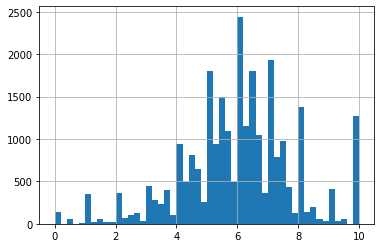

In [288]:
tmdb_movies_df.vote_average.hist(bins=50);

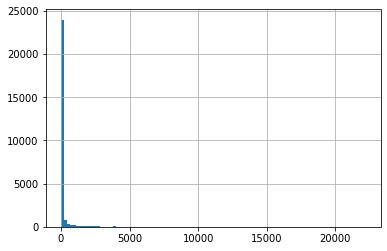

In [290]:
tmdb_movies_df.vote_count.hist(bins=100);

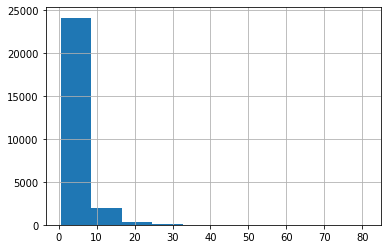

In [286]:
tmdb_movies_df.popularity.hist();